In [ ]:
import pandas as pd
import numpy as np

## Задание 0


Для всех  заданий будем использовать обезличенные транзакционные банковские данные. Для этого считайте в переменные **tr_mcc_codes, tr_types, transactions и gender_train** из одноимённых таблиц из папки [data](https://drive.google.com/drive/folders/1YAMe7MiTxA-RSSd8Ex2p-L0Dspe6Gs4L). 

Для таблицы transactions используйте только первые n=1000000 строк. При чтении файлов обратите внимание на разделители внутри каждого из файлов - они могут различаться!

###  Описание данных
#### Таблица ```transactions.csv```
##### Описание
Таблица содержит историю транзакций клиентов банка за один год и три месяца.

##### Формат данных

```
customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
111111,15 01:40:52,1111,1000,-5224,111111
111112,15 15:18:32,3333,2000,-100,11122233
...
```
##### Описание полей

 - ```customer_id``` — идентификатор клиента;
 - ```tr_datetime``` — день и время совершения транзакции (дни нумеруются с начала данных);
 - ```mcc_code``` — mcc-код транзакции;
 - ```tr_type``` — тип транзакции;
 - ```amount``` — сумма транзакции в условных единицах со знаком; ```+``` — начисление средств клиенту (приходная транзакция), ```-``` — списание средств (расходная транзакция);
 - ```term_id``` — идентификатор терминала;


#### Таблица ```gender_train.csv```

##### Описание
Данная таблица содержит информацию по полу для части клиентов, для которых он известен. Для остальных клиентов пол неизвестен.

##### Формат данных
```
customer_id,gender
111111,0
111112,1
...
```

##### Описание полей
 - ```customer_id``` — идентификатор клиента;
 - ```gender``` — пол клиента;

### Таблица ```tr_mcc_codes.csv```

##### Описание
Данная таблица содержит описание mcc-кодов транзакций.

##### Формат данных
```
mcc_code;mcc_description
1000;словесное описание mcc-кода 1000
2000;словесное описание mcc-кода 2000
...
```

##### Описание полей
 - ```mcc_code``` – mcc-код транзакции;
 - ```mcc_description``` — описание mcc-кода транзакции.

#### Таблица ```tr_types.csv```

##### Описание
Данная таблица содержит описание типов транзакций.

##### Формат данных
```
tr_type;tr_description
1000;словесное описание типа транзакции 1000
2000;словесное описание типа транзакции 2000
...
```

##### Описание полей
 - ```tr_type``` – тип транзакции;
 - ```tr_description``` — описание типа транзакции;


In [ ]:
!wget https://www.dropbox.com/s/5deipwkmeial1ba/tr_types.csv
!wget https://www.dropbox.com/s/axkihywa8q118rk/transactions.csv

--2021-10-14 16:50:46--  https://www.dropbox.com/s/5deipwkmeial1ba/tr_types.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5deipwkmeial1ba/tr_types.csv [following]
--2021-10-14 16:50:46--  https://www.dropbox.com/s/raw/5deipwkmeial1ba/tr_types.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc6c9ff1d87db99b9a99598d23af.dl.dropboxusercontent.com/cd/0/inline/BYD2pSWlm9fOUleBGZxV4aw7sxv-Pm95VkJeMPYPx59xSxNKjRpOFsD-vvQcR3dPnFhNXfY5-ASGWY6lxttequl_xObez078bPM40r26WZrI2YqFYtddN_fCRo5fgFkKOU71TpBo2LsYPTJd2a4iBN5r/file# [following]
--2021-10-14 16:50:47--  https://uc6c9ff1d87db99b9a99598d23af.dl.dropboxusercontent.com/cd/0/inline/BYD2pSWlm9fOUleBGZxV4aw7sxv-Pm95VkJeMPYPx59xSxNKjRpOFsD-vvQcR3dPnFhNXfY5-ASGWY6lxttequl_xO

In [ ]:
!wget https://www.dropbox.com/s/qc307hdkc9jdxf8/gender_train.csv
!wget https://www.dropbox.com/s/xwbkjwik600clsh/tr_mcc_codes.csv

--2021-10-14 16:50:52--  https://www.dropbox.com/s/qc307hdkc9jdxf8/gender_train.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.18, 2620:100:601a:18::a27d:712
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/qc307hdkc9jdxf8/gender_train.csv [following]
--2021-10-14 16:50:53--  https://www.dropbox.com/s/raw/qc307hdkc9jdxf8/gender_train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9d2aaf50d00b4c93a2a94b8fe5.dl.dropboxusercontent.com/cd/0/inline/BYCcIJmLms6Gd_lfpNBsSDYHamU0GUPXc7heOeDbb8dGMbL0czVBbMMIh03gkhIcgxhydGywC9y2byloLYadgDdBb8sripg6yoegYXnUM8Y2sI0wdevzZhiTpslKplcqQT6IQpxIVMGjFCc8KX_ch6L1/file# [following]
--2021-10-14 16:50:53--  https://uc9d2aaf50d00b4c93a2a94b8fe5.dl.dropboxusercontent.com/cd/0/inline/BYCcIJmLms6Gd_lfpNBsSDYHamU0GUPXc7heOeDbb8dGMbL0czVBbMMIh03gkhIcgxhydGywC9y2by



Задания 1-4 делаются без использования merge!

## Задание 1




1. Для столбца tr_type датафрейма transactions выберите произвольные 1000 строк с помощью метода sample
2. В полученной на предыдущем этапе подвыборке найдите долю транзакций (стобец tr_description в датасете tr_types), в которой содержится подстрока 'POS' или 'ATM'

In [ ]:
transactions = pd.read_csv("transactions.csv", nrows=1000000, sep=',')
df_types = pd.read_csv("tr_types.csv", sep=';')

In [ ]:
df_types.index = df_types.tr_type.to_list()
sample = transactions['tr_type'].sample(1000)
types_from_sample = df_types.loc[sample]


In [ ]:
print('Доля транзакций с подстроками POS и ATM:')
sum = types_from_sample.tr_description.str.contains('АТМ').sum()
sum += types_from_sample.tr_description.str.contains('POS').sum()
print(sum / types_from_sample.shape[0])

Доля транзакций с подстроками POS и ATM:
0.607


## Задание 2 


1. Для столбца tr_type датафрейма transactions посчитайте частоту встречаемости всех типов транзакций tr_type в transactions.
2. Выведите топ-10 транзакций по частоте встречаемости (вывести для них tr_description тоже).

In [ ]:
top = transactions.tr_type.value_counts(sort=True)[:10].index

In [ ]:
print('Самые популярные транзакции:')
for i in range(len(top)):
    print(df_types[df_types.tr_type == top[i]])

Самые популярные транзакции:
      tr_type         tr_description
1010     1010  Покупка. POS ТУ СБ РФ
      tr_type                         tr_description
2010     2010  Выдача наличных в АТМ Сбербанк России
      tr_type                                     tr_description
7070     7070  Перевод на карту (с карты) через Мобильный бан...
      tr_type          tr_description
1110     1110  Покупка. POS ТУ Россия
      tr_type                  tr_description
1030     1030  Оплата услуги. Банкоматы СБ РФ
      tr_type                                     tr_description
2370     2370  Списание с карты на карту по операции <перевод...
      tr_type                                tr_description
7010     7010  Взнос наличных через АТМ (в своем тер.банке)
      tr_type                                     tr_description
7030     7030  Перевод на карту (с карты) через АТМ (в предел...
      tr_type                                     tr_description
7071     7071  Перевод на карту (с карты) через 

## Задание 3
1. В датафрейме transactions найдите клиента с максимальной суммой приходов на карту
2. В датафрейме transactions найдите клиента с максимальной суммой расходов по карте
3. Найдите модуль разницы для этих клиентов между суммой расходов и суммой приходов

In [ ]:
# Максимальный приход на карту
max = transactions.query('amount > 0').groupby('customer_id').aggregate({'amount': 'sum'}).sort_values('amount', ascending=False).head(1).amount
print(max)

customer_id
70780820    1.248115e+09
Name: amount, dtype: float64


In [ ]:
# Максимальный расход по карте
min = transactions.query('amount < 0').groupby('customer_id').aggregate({'amount': 'sum'}).sort_values('amount', ascending=True).head(1).amount
print(min)

customer_id
70780820   -1.249952e+09
Name: amount, dtype: float64


In [ ]:
print('Разность между расходами и доходами:')
print(1.249952e+09 - 1.248115e+09)

Разность между расходами и доходами:
1837000.0


In [ ]:
# Дополнительное задание на защиту
transaction_for_particular_client = transactions.query('customer_id == 70780820')

In [ ]:
import matplotlib.pylab as plt

In [ ]:
day_sum_map = {}
account_sum = 0
for i in range(457): #456
  cur_date = "tr_datetime.str.startswith(\'" + str(i) + " " + "\')"
  cur_date_amount = transaction_for_particular_client.query(cur_date, engine='python').aggregate({"amount":"sum"})
  account_sum += cur_date_amount.amount
  day_sum_map[i] = account_sum


In [ ]:
max = 0.0
max_start_date = 0
for i in range(len(day_sum_map) - 30):  
  cur_average = 0.0  
  for j in range(i, i + 30):
    cur_average += day_sum_map[j]
  cur_average = cur_average / 30
  if max < cur_average:
    max = cur_average
    max_start_date = i
print("Max average:")
print(max)
print("Max average start date:")
print(max_start_date)
print("Max average end date:")
print(max_start_date + 30)

Max average:
5681776.153666672
Max average start date:
270
Max average end date:
300


<function matplotlib.pyplot.show>

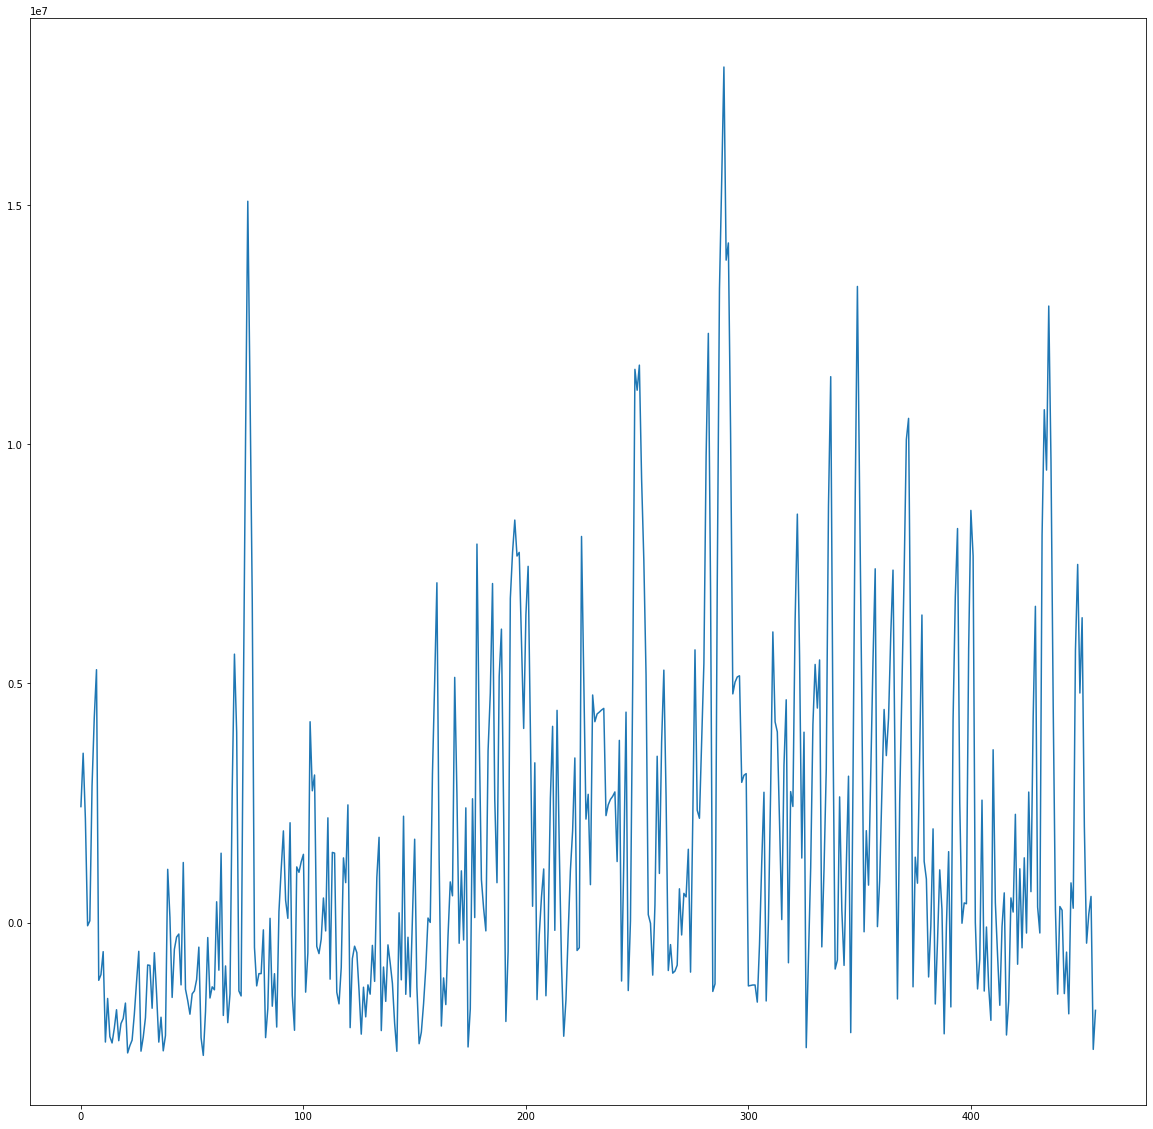

In [ ]:
lists = sorted(day_sum_map.items())
x, y = zip(*lists)
plt.rcParams["figure.figsize"] = (20,20)
plt.plot(x,y)
plt.show

## Задание 4
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций из топ 10 из задания 2
1. Найдите среднее арифметическое и медиану по amount по всем типам транзакций для клиентов из задания 3

In [ ]:
transactions[transactions.customer_id.isin([70780820])].groupby('tr_type').aggregate({'amount' : ['mean', 'median']})

amount             
                 mean       median
tr_type                           
2010    -2.941056e+06 -3368873.660
2330    -2.382398e+06 -2245915.770
2370    -2.218505e+06 -2245915.770
6110     1.756293e+04    10028.010
7020     1.465129e+04    10319.985
7021     2.850067e+04    28500.670
7030     1.406196e+04     8848.910
7031     1.921036e+04    12992.620
7034     1.430648e+04    14306.480
7040     2.153833e+04    14396.320
7070     1.384821e+04     8714.150
7071     1.860057e+04    12543.440
7074     2.281159e+04     9387.930

## Подготовка для заданий 5-8

*Из заданий 5-8 нужно выполнить минимум два любых*

Соедините transactions с всеми остальными таблицами (tr_mcc_codes, tr_types, gender_train). Причём с gender_train необходимо смёрджиться с помощью left join, а с оставшимися датафреймами - через inner.
После получения результата таблицы gender_train, tr_types, tr_mcc_codes можно удалить. В результате соединения датафреймов должно получиться 999584 строки.

In [ ]:
transactions = pd.read_csv('transactions.csv', nrows=1000000, sep=',')
gender_train = pd.read_csv('gender_train.csv', sep=',')
tr_mcc_codes = pd.read_csv('tr_mcc_codes.csv', sep=';')
tr_types = pd.read_csv('tr_types.csv', sep=';')

In [ ]:
transactions = pd.merge(transactions, gender_train, how='left')
transactions = pd.merge(transactions, tr_mcc_codes, how='inner')
transactions = pd.merge(transactions, tr_types, how='inner')
transactions.shape

(999584, 9)

## Задание 5

1. Определите модуль разницы между средними тратами женщин и мужчин (трата - отрицательное значение amount).
2. Определите модуль разницы между средними поступлениями у мужчин и женщин

Обратите внимание, что для вычисления модуля разности точных знаний о том, 
какой класc относится к мужчинам, а какой - к женщинам, не требуется.

In [ ]:
transactions.query('amount < 0').groupby('gender').aggregate({'amount': 'mean'})

,amount
gender,
0.0,-53376.917122
1.0,-86094.972042


In [ ]:
print('Разность между тратами:')
diff = 86094 - 53376
print(diff)

Разность между тратами:
32718


In [ ]:
transactions.query('amount > 0').groupby('gender').aggregate({'amount': 'median'})

,amount
gender,
0.0,22459.16
1.0,11319.42


In [ ]:
print('Разность между поступлениями:')
diff = 11319 - 22459
print(diff)

Разность между поступлениями:
-11140


## Задание 6

1. По всем типам транзакций рассчитайте максимальную сумму прихода на карту (из строго положительных сумм по столбцу amount) отдельно для мужчин и женщин (назовите ее "max_income"). Оставьте по 10 типов транзакций для мужчин и для женщин, наименьших среди всех типов транзакций по полученным значениям "max_income". 
2. Выделите среди них те типы транзакций, которые встречаются одновременно и у мужчин, и у женщин

In [ ]:
men = transactions.query("amount > 0 and gender==1").groupby('tr_type').aggregate({'amount': 'sum'}).sort_values('amount')[:10]
women = transactions.query("amount > 0 and gender==0").groupby('tr_type').aggregate({'amount': 'sum'}).sort_values('amount')[:10]
print(men)
print(women)
intersect = pd.merge(men, women, how='inner', on='tr_type')
print(intersect)

            amount
tr_type           
2020       2245.92
4110       4491.84
1010      35317.03
8100      64682.37
6000      79280.83
7041      87590.72
2370     113194.15
7015     121279.45
2110     179673.26
2010     224591.59
           amount
tr_type          
4051      1122.96
4210      2245.92
4110      2245.92
2370      2335.75
7075      6737.75
2110     22459.16
1010     31532.66
4100     40334.88
2210     68315.82
1210     83644.87
          amount_x  amount_y
tr_type                     
4110       4491.84   2245.92
1010      35317.03  31532.66
2370     113194.15   2335.75
2110     179673.26  22459.16


## Задание 7

1. Найдите суммы затрат по каждой категории (mcc) для мужчин и для женщин. 
2. Найдите топ 10 категорий с самыми большими относительными модулями разности в тратах для разных полов (в ответе должны присутствовать описания mcc кодов).

## Задание 8

1. Из поля tr_datetime выделите час tr_hour, в который произошла транзакция, как первые 2 цифры до ":". (\**)
2. Посчитайте количество транзакций с amount<0 в ночное время для мужчин и женщин. Ночное время - это примерно 00-06 часов.